In [2]:
# Wine Quality Prediction Project
# Red Wine Quality Analysis - Regression & Classification

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Sklearn imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve)
import joblib

In [4]:
# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
# ============================================================================
# STEP 1: LOAD DATASET
# ============================================================================
print("="*80)
print("STEP 1: LOADING DATASET")
print("="*80)

# Load the dataset (adjust the filename as needed)
# Note: This dataset uses semicolons as delimiters
df = pd.read_csv('winequality-red.csv', sep=';')

print(f"\nDataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

STEP 1: LOADING DATASET

Dataset loaded successfully!
Shape: (1599, 12)

First few rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56  

In [7]:
# ============================================================================
# STEP 2: PROBLEM DEFINITION
# ============================================================================
print("\n" + "="*80)
print("STEP 2: PROBLEM DEFINITION")
print("="*80)
print("\nREGRESSION TASK: Predict wine quality (numeric score 0-10)")
print("CLASSIFICATION TASK: Classify wines as 'good' (quality >= 7) or 'bad' (quality < 7)")


STEP 2: PROBLEM DEFINITION

REGRESSION TASK: Predict wine quality (numeric score 0-10)
CLASSIFICATION TASK: Classify wines as 'good' (quality >= 7) or 'bad' (quality < 7)



STEP 3: EXPLORATORY DATA ANALYSIS

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

--- Data Types ---
fixed acidity           float64
volatile aci

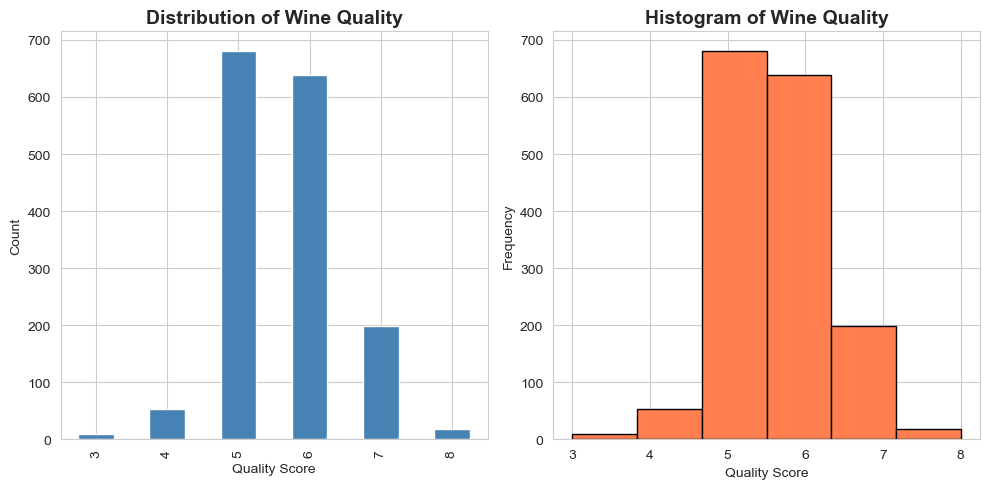

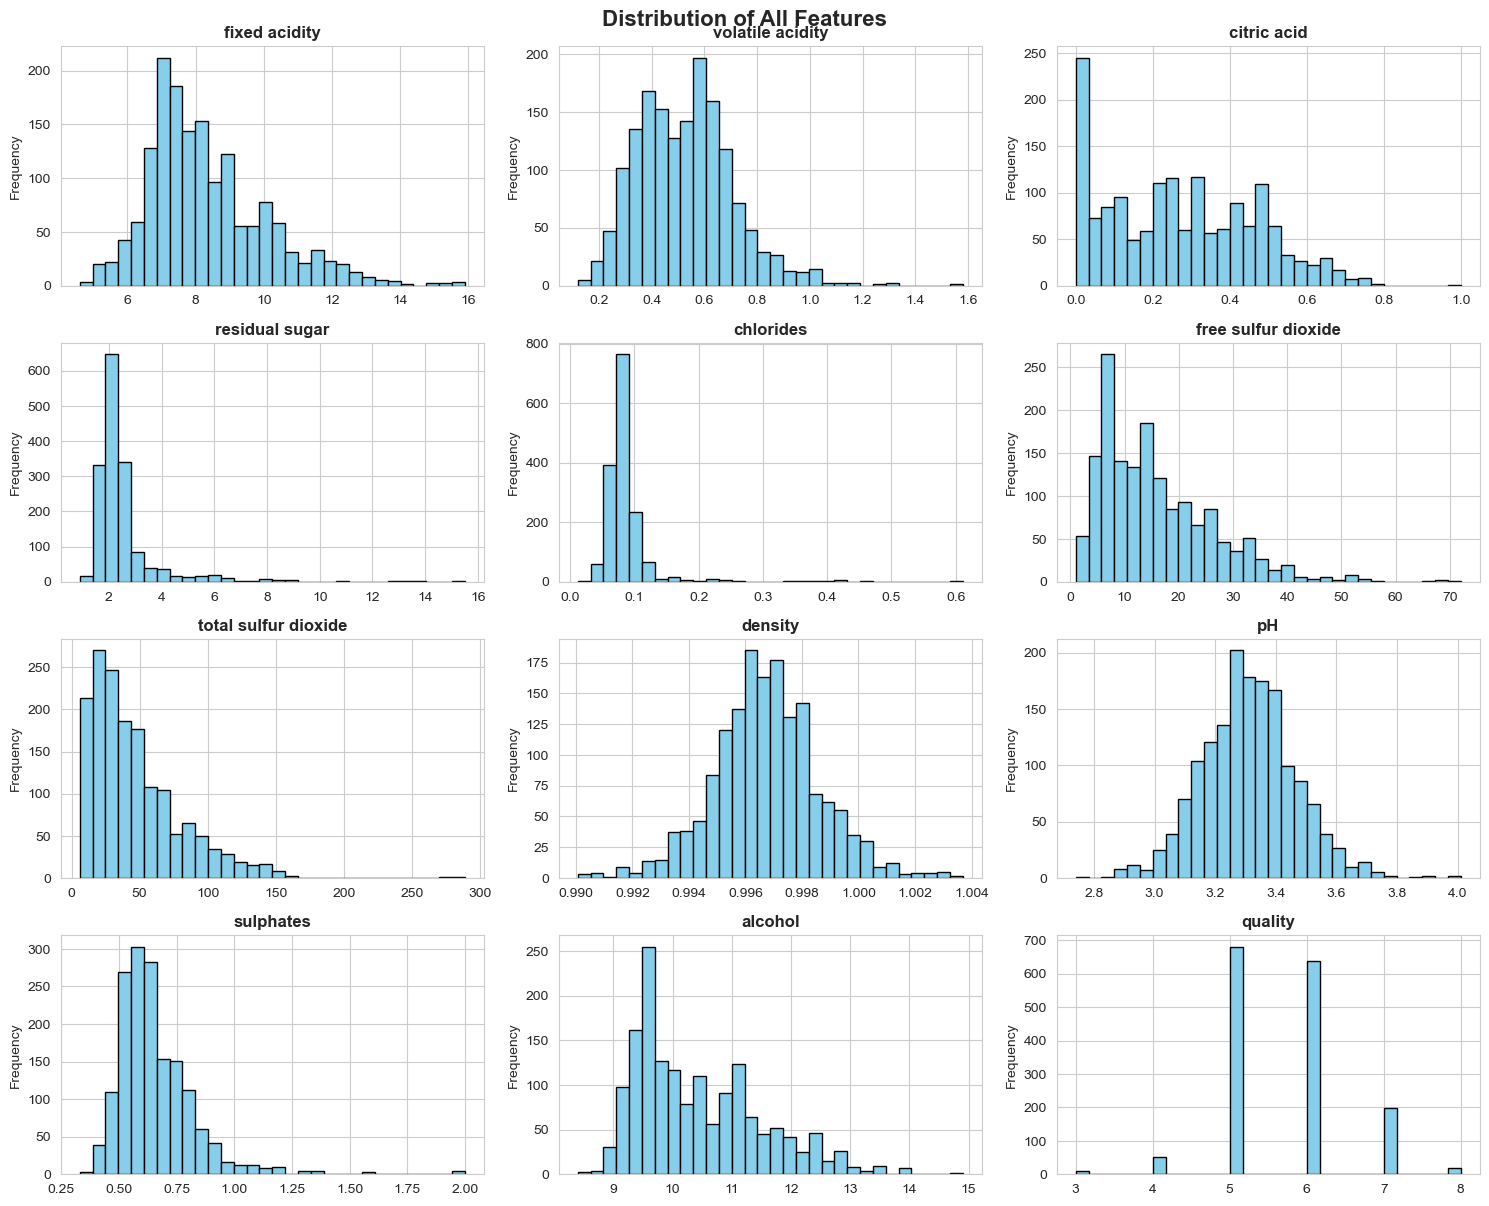

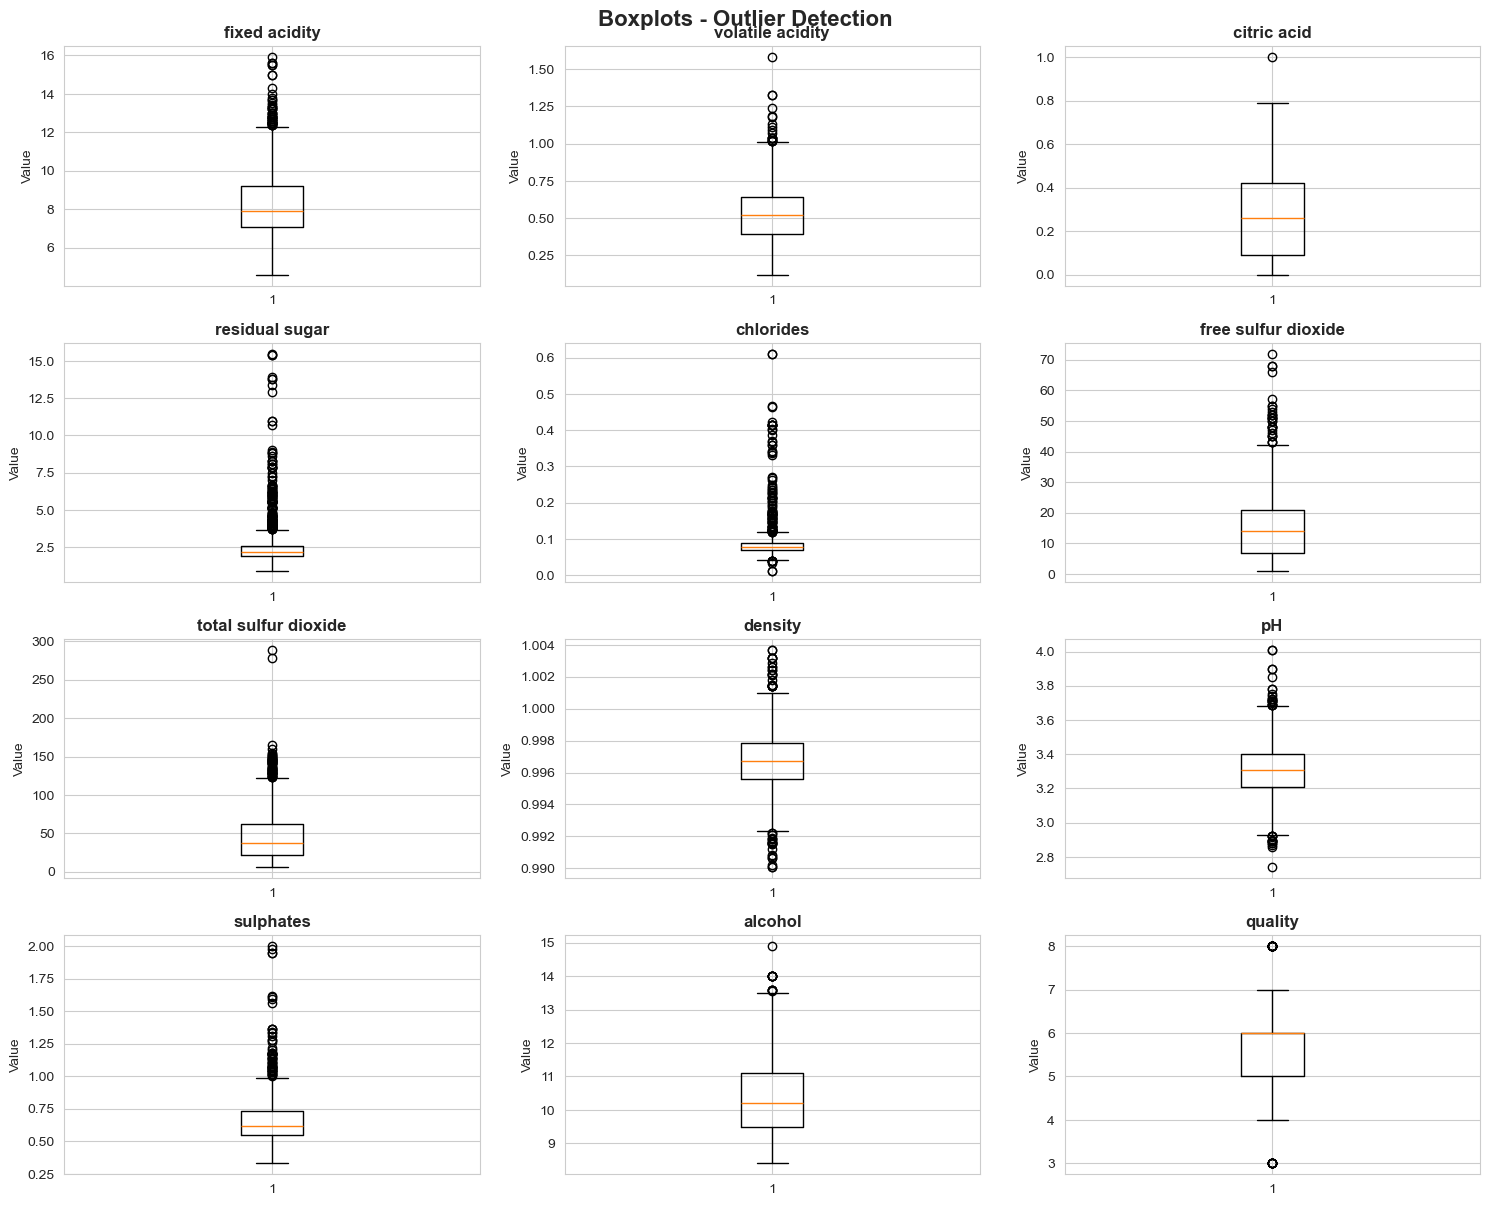

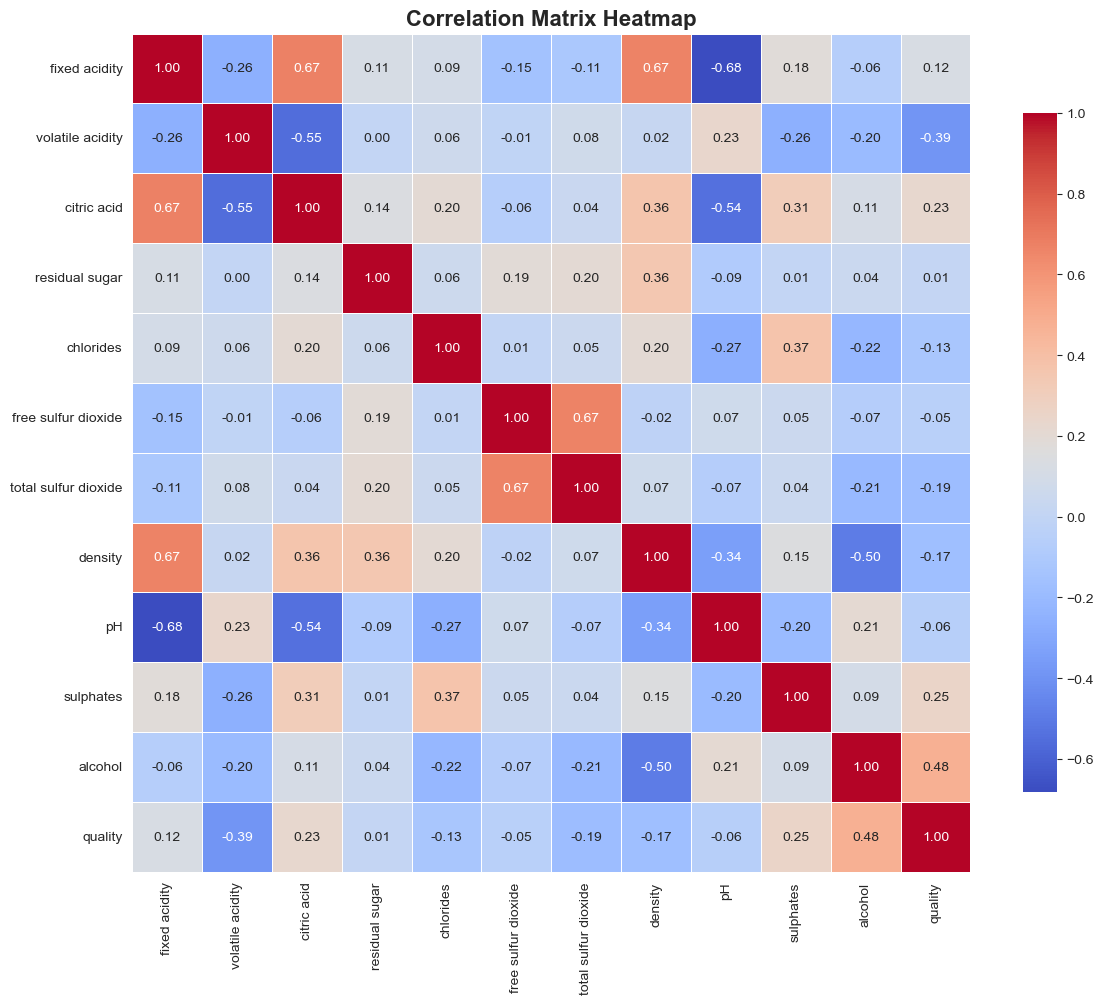


--- Correlation with Quality ---
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


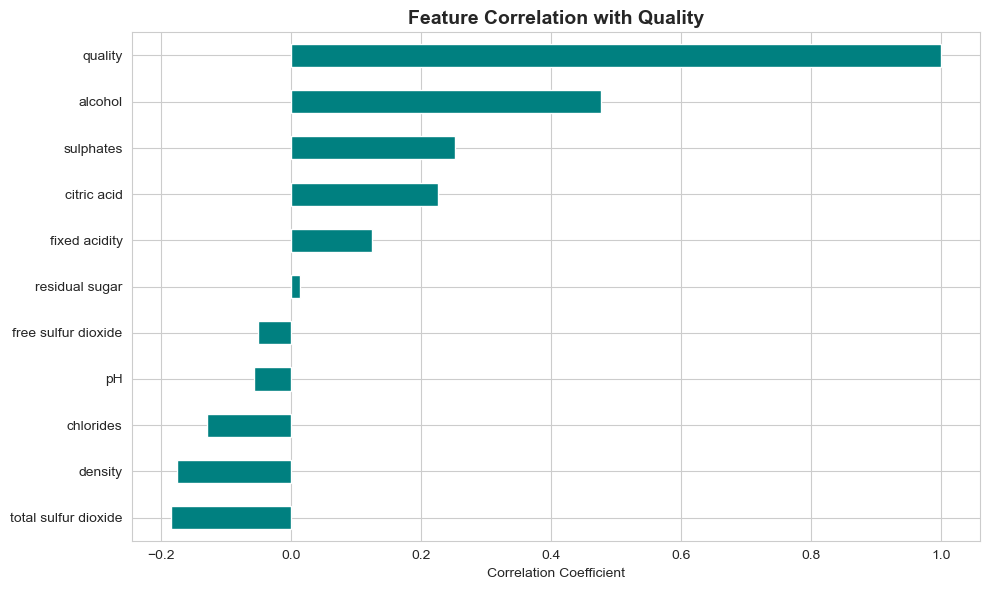

In [8]:
# ============================================================================
# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================
print("\n" + "="*80)
print("STEP 3: EXPLORATORY DATA ANALYSIS")
print("="*80)

# Basic info
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- Descriptive Statistics ---")
print(df.describe())

print("\n--- Quality Distribution ---")
print(df['quality'].value_counts().sort_index())

# Check for missing values
print("\n--- Missing Values ---")
missing = df.isnull().sum()
print(missing)
print(f"\nTotal missing values: {missing.sum()}")

# Visualizations
print("\n--- Generating Visualizations ---")

# 1. Quality distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Distribution of Wine Quality', fontsize=14, fontweight='bold')
plt.xlabel('Quality Score')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['quality'].hist(bins=6, color='coral', edgecolor='black')
plt.title('Histogram of Wine Quality', fontsize=14, fontweight='bold')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Feature distributions
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(col, fontweight='bold')
    axes[idx].set_ylabel('Frequency')
    
plt.tight_layout()
plt.suptitle('Distribution of All Features', y=1.001, fontsize=16, fontweight='bold')
plt.show()

# 3. Boxplots for outlier detection
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    axes[idx].boxplot(df[col])
    axes[idx].set_title(col, fontweight='bold')
    axes[idx].set_ylabel('Value')
    
plt.tight_layout()
plt.suptitle('Boxplots - Outlier Detection', y=1.001, fontsize=16, fontweight='bold')
plt.show()

# 4. Correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. Features vs Quality
print("\n--- Correlation with Quality ---")
quality_corr = df.corr()['quality'].sort_values(ascending=False)
print(quality_corr)

plt.figure(figsize=(10, 6))
quality_corr[:-1].sort_values().plot(kind='barh', color='teal')
plt.title('Feature Correlation with Quality', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [9]:
# ============================================================================
# STEP 4: PREPROCESSING
# ============================================================================
print("\n" + "="*80)
print("STEP 4: DATA PREPROCESSING")
print("="*80)

# Check for outliers using IQR method
print("\n--- Outlier Detection (IQR Method) ---")
outlier_counts = {}
for col in df.columns[:-1]:  # Exclude quality
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)
    
outlier_df = pd.DataFrame(outlier_counts.items(), columns=['Feature', 'Outlier Count'])
print(outlier_df.sort_values('Outlier Count', ascending=False))

# For this project, we'll keep outliers as they may be meaningful
print("\nDecision: Keeping outliers as they may represent genuine wine characteristics")

# Handle missing values (if any)
if df.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    df = df.fillna(df.mean())
else:
    print("\nNo missing values found!")

# Create classification target (good wine: quality >= 7)
df['quality_binary'] = (df['quality'] >= 7).astype(int)

print(f"\n--- Binary Classification Distribution ---")
print(df['quality_binary'].value_counts())
print(f"Percentage of good wines: {df['quality_binary'].mean()*100:.2f}%")

# Separate features and targets
X = df.drop(['quality', 'quality_binary'], axis=1)
y_regression = df['quality']
y_classification = df['quality_binary']

print(f"\nFeatures shape: {X.shape}")
print(f"Features: {list(X.columns)}")


STEP 4: DATA PREPROCESSING

--- Outlier Detection (IQR Method) ---
                 Feature  Outlier Count
3         residual sugar            155
4              chlorides            112
9              sulphates             59
6   total sulfur dioxide             55
0          fixed acidity             49
7                density             45
8                     pH             35
5    free sulfur dioxide             30
1       volatile acidity             19
10               alcohol             13
2            citric acid              1

Decision: Keeping outliers as they may represent genuine wine characteristics

No missing values found!

--- Binary Classification Distribution ---
quality_binary
0    1382
1     217
Name: count, dtype: int64
Percentage of good wines: 13.57%

Features shape: (1599, 11)
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [10]:
# ============================================================================
# STEP 5: TRAIN/TEST SPLIT
# ============================================================================
print("\n" + "="*80)
print("STEP 5: TRAIN/TEST SPLIT")
print("="*80)

# Split data (80/20)
X_train, X_test, y_reg_train, y_reg_test = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)

X_train_clf, X_test_clf, y_clf_train, y_clf_test = train_test_split(
    X, y_classification, test_size=0.2, random_state=42, stratify=y_classification
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Standardize features (important for linear models like LogisticRegression/SVM)
print("\n--- Standardizing Features ---")
print("Why? Linear models (LogisticRegression, SVM) are sensitive to feature scales.")
print("StandardScaler transforms features to have mean=0 and standard deviation=1")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

print("\n✓ Features standardized using StandardScaler")
print(f"Example - Before scaling (first feature): mean={X_train.iloc[:, 0].mean():.2f}, std={X_train.iloc[:, 0].std():.2f}")
print(f"Example - After scaling (first feature): mean={X_train_scaled[:, 0].mean():.2f}, std={X_train_scaled[:, 0].std():.2f}")


STEP 5: TRAIN/TEST SPLIT
Training set size: 1279
Test set size: 320

--- Standardizing Features ---
Why? Linear models (LogisticRegression, SVM) are sensitive to feature scales.
StandardScaler transforms features to have mean=0 and standard deviation=1

✓ Features standardized using StandardScaler
Example - Before scaling (first feature): mean=8.32, std=1.72
Example - After scaling (first feature): mean=-0.00, std=1.00


In [11]:
# ============================================================================
# STEP 6: BASELINE MODELS
# ============================================================================
print("\n" + "="*80)
print("STEP 6: BASELINE MODELS")
print("="*80)

# Regression baseline: predict mean
mean_quality = y_reg_train.mean()
baseline_reg_pred = np.full(len(y_reg_test), mean_quality)
baseline_mae = mean_absolute_error(y_reg_test, baseline_reg_pred)
baseline_rmse = np.sqrt(mean_squared_error(y_reg_test, baseline_reg_pred))
baseline_r2 = r2_score(y_reg_test, baseline_reg_pred)

print("\n--- REGRESSION BASELINE (Predict Mean) ---")
print(f"Mean Quality: {mean_quality:.2f}")
print(f"Baseline MAE: {baseline_mae:.4f}")
print(f"Baseline RMSE: {baseline_rmse:.4f}")
print(f"Baseline R²: {baseline_r2:.4f}")

# Classification baseline: predict majority class
majority_class = y_clf_train.mode()[0]
baseline_clf_pred = np.full(len(y_clf_test), majority_class)
baseline_accuracy = accuracy_score(y_clf_test, baseline_clf_pred)

print("\n--- CLASSIFICATION BASELINE (Majority Class) ---")
print(f"Majority Class: {majority_class}")
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")


STEP 6: BASELINE MODELS

--- REGRESSION BASELINE (Predict Mean) ---
Mean Quality: 5.62
Baseline MAE: 0.6853
Baseline RMSE: 0.8107
Baseline R²: -0.0056

--- CLASSIFICATION BASELINE (Majority Class) ---
Majority Class: 0
Baseline Accuracy: 0.8656


In [12]:
# ============================================================================
# STEP 7: REGRESSION MODELS
# ============================================================================
print("\n" + "="*80)
print("STEP 7: TRAINING REGRESSION MODELS")
print("="*80)

regression_results = {}

# 1. Linear Regression
print("\n--- Training Linear Regression ---")
lr = LinearRegression()
lr.fit(X_train_scaled, y_reg_train)
lr_pred = lr.predict(X_test_scaled)

lr_mae = mean_absolute_error(y_reg_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_reg_test, lr_pred))
lr_r2 = r2_score(y_reg_test, lr_pred)

print(f"MAE: {lr_mae:.4f}")
print(f"RMSE: {lr_rmse:.4f}")
print(f"R²: {lr_r2:.4f}")

regression_results['Linear Regression'] = {
    'MAE': lr_mae, 'RMSE': lr_rmse, 'R²': lr_r2, 'model': lr
}

# 2. Random Forest Regressor
print("\n--- Training Random Forest Regressor ---")
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_reg_train)
rf_reg_pred = rf_reg.predict(X_test)

rf_reg_mae = mean_absolute_error(y_reg_test, rf_reg_pred)
rf_reg_rmse = np.sqrt(mean_squared_error(y_reg_test, rf_reg_pred))
rf_reg_r2 = r2_score(y_reg_test, rf_reg_pred)

print(f"MAE: {rf_reg_mae:.4f}")
print(f"RMSE: {rf_reg_rmse:.4f}")
print(f"R²: {rf_reg_r2:.4f}")

regression_results['Random Forest'] = {
    'MAE': rf_reg_mae, 'RMSE': rf_reg_rmse, 'R²': rf_reg_r2, 'model': rf_reg
}

# 3. Gradient Boosting Regressor
print("\n--- Training Gradient Boosting Regressor ---")
gb_reg = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_reg.fit(X_train, y_reg_train)
gb_reg_pred = gb_reg.predict(X_test)

gb_reg_mae = mean_absolute_error(y_reg_test, gb_reg_pred)
gb_reg_rmse = np.sqrt(mean_squared_error(y_reg_test, gb_reg_pred))
gb_reg_r2 = r2_score(y_reg_test, gb_reg_pred)

print(f"MAE: {gb_reg_mae:.4f}")
print(f"RMSE: {gb_reg_rmse:.4f}")
print(f"R²: {gb_reg_r2:.4f}")

regression_results['Gradient Boosting'] = {
    'MAE': gb_reg_mae, 'RMSE': gb_reg_rmse, 'R²': gb_reg_r2, 'model': gb_reg
}

# Summary of regression results
print("\n--- REGRESSION RESULTS SUMMARY ---")
results_df = pd.DataFrame(regression_results).T
print(results_df[['MAE', 'RMSE', 'R²']])


STEP 7: TRAINING REGRESSION MODELS

--- Training Linear Regression ---
MAE: 0.5035
RMSE: 0.6245
R²: 0.4032

--- Training Random Forest Regressor ---
MAE: 0.4224
RMSE: 0.5489
R²: 0.5390

--- Training Gradient Boosting Regressor ---
MAE: 0.4849
RMSE: 0.6019
R²: 0.4456

--- REGRESSION RESULTS SUMMARY ---
                        MAE      RMSE        R²
Linear Regression   0.50353   0.62452   0.40318
Random Forest      0.422438  0.548852  0.539043
Gradient Boosting  0.484936  0.601943  0.445552


In [13]:
# ============================================================================
# STEP 8: HYPERPARAMETER TUNING (REGRESSION)
# ============================================================================
print("\n" + "="*80)
print("STEP 8: HYPERPARAMETER TUNING - REGRESSION")
print("="*80)

# Tune Random Forest
print("\n--- Tuning Random Forest Regressor ---")
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

rf_grid.fit(X_train, y_reg_train)
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best CV MAE: {-rf_grid.best_score_:.4f}")

best_rf_reg = rf_grid.best_estimator_
best_rf_pred = best_rf_reg.predict(X_test)
best_rf_mae = mean_absolute_error(y_reg_test, best_rf_pred)
best_rf_rmse = np.sqrt(mean_squared_error(y_reg_test, best_rf_pred))
best_rf_r2 = r2_score(y_reg_test, best_rf_pred)

print(f"\nTuned Model Performance:")
print(f"MAE: {best_rf_mae:.4f}")
print(f"RMSE: {best_rf_rmse:.4f}")
print(f"R²: {best_rf_r2:.4f}")


STEP 8: HYPERPARAMETER TUNING - REGRESSION

--- Tuning Random Forest Regressor ---
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV MAE: 0.4294

Tuned Model Performance:
MAE: 0.4251
RMSE: 0.5531
R²: 0.5319


In [14]:
# ============================================================================
# STEP 9: CLASSIFICATION MODELS
# ============================================================================
print("\n" + "="*80)
print("STEP 9: TRAINING CLASSIFICATION MODELS")
print("="*80)

classification_results = {}

# 1. Logistic Regression
print("\n--- Training Logistic Regression ---")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_clf_scaled, y_clf_train)
log_reg_pred = log_reg.predict(X_test_clf_scaled)
log_reg_proba = log_reg.predict_proba(X_test_clf_scaled)[:, 1]

log_acc = accuracy_score(y_clf_test, log_reg_pred)
log_prec = precision_score(y_clf_test, log_reg_pred)
log_rec = recall_score(y_clf_test, log_reg_pred)
log_f1 = f1_score(y_clf_test, log_reg_pred)
log_auc = roc_auc_score(y_clf_test, log_reg_proba)

print(f"Accuracy: {log_acc:.4f}")
print(f"Precision: {log_prec:.4f}")
print(f"Recall: {log_rec:.4f}")
print(f"F1-Score: {log_f1:.4f}")
print(f"ROC AUC: {log_auc:.4f}")

classification_results['Logistic Regression'] = {
    'Accuracy': log_acc, 'Precision': log_prec, 'Recall': log_rec,
    'F1': log_f1, 'ROC AUC': log_auc, 'model': log_reg
}

# 2. Random Forest Classifier
print("\n--- Training Random Forest Classifier ---")
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train_clf, y_clf_train)
rf_clf_pred = rf_clf.predict(X_test_clf)
rf_clf_proba = rf_clf.predict_proba(X_test_clf)[:, 1]

rf_acc = accuracy_score(y_clf_test, rf_clf_pred)
rf_prec = precision_score(y_clf_test, rf_clf_pred)
rf_rec = recall_score(y_clf_test, rf_clf_pred)
rf_f1 = f1_score(y_clf_test, rf_clf_pred)
rf_auc = roc_auc_score(y_clf_test, rf_clf_proba)

print(f"Accuracy: {rf_acc:.4f}")
print(f"Precision: {rf_prec:.4f}")
print(f"Recall: {rf_rec:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"ROC AUC: {rf_auc:.4f}")

classification_results['Random Forest'] = {
    'Accuracy': rf_acc, 'Precision': rf_prec, 'Recall': rf_rec,
    'F1': rf_f1, 'ROC AUC': rf_auc, 'model': rf_clf
}

# 3. Gradient Boosting Classifier
print("\n--- Training Gradient Boosting Classifier ---")
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_clf.fit(X_train_clf, y_clf_train)
gb_clf_pred = gb_clf.predict(X_test_clf)
gb_clf_proba = gb_clf.predict_proba(X_test_clf)[:, 1]

gb_acc = accuracy_score(y_clf_test, gb_clf_pred)
gb_prec = precision_score(y_clf_test, gb_clf_pred)
gb_rec = recall_score(y_clf_test, gb_clf_pred)
gb_f1 = f1_score(y_clf_test, gb_clf_pred)
gb_auc = roc_auc_score(y_clf_test, gb_clf_proba)

print(f"Accuracy: {gb_acc:.4f}")
print(f"Precision: {gb_prec:.4f}")
print(f"Recall: {gb_rec:.4f}")
print(f"F1-Score: {gb_f1:.4f}")
print(f"ROC AUC: {gb_auc:.4f}")

classification_results['Gradient Boosting'] = {
    'Accuracy': gb_acc, 'Precision': gb_prec, 'Recall': gb_rec,
    'F1': gb_f1, 'ROC AUC': gb_auc, 'model': gb_clf
}

# Summary
print("\n--- CLASSIFICATION RESULTS SUMMARY ---")
clf_results_df = pd.DataFrame(classification_results).T
print(clf_results_df[['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']])


STEP 9: TRAINING CLASSIFICATION MODELS

--- Training Logistic Regression ---
Accuracy: 0.8938
Precision: 0.6957
Recall: 0.3721
F1-Score: 0.4848
ROC AUC: 0.8804

--- Training Random Forest Classifier ---
Accuracy: 0.9437
Precision: 0.9310
Recall: 0.6279
F1-Score: 0.7500
ROC AUC: 0.9554

--- Training Gradient Boosting Classifier ---
Accuracy: 0.9156
Precision: 0.7857
Recall: 0.5116
F1-Score: 0.6197
ROC AUC: 0.8919

--- CLASSIFICATION RESULTS SUMMARY ---
                     Accuracy Precision    Recall        F1   ROC AUC
Logistic Regression   0.89375  0.695652  0.372093  0.484848  0.880363
Random Forest         0.94375  0.931034  0.627907      0.75  0.955419
Gradient Boosting    0.915625  0.785714  0.511628  0.619718  0.891949


In [15]:
# ============================================================================
# STEP 10: HYPERPARAMETER TUNING (CLASSIFICATION)
# ============================================================================
print("\n" + "="*80)
print("STEP 10: HYPERPARAMETER TUNING - CLASSIFICATION")
print("="*80)

print("\n--- Tuning Random Forest Classifier ---")
rf_clf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_clf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_clf_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

rf_clf_grid.fit(X_train_clf, y_clf_train)
print(f"Best parameters: {rf_clf_grid.best_params_}")
print(f"Best CV F1: {rf_clf_grid.best_score_:.4f}")

best_rf_clf = rf_clf_grid.best_estimator_
best_rf_clf_pred = best_rf_clf.predict(X_test_clf)
best_rf_clf_proba = best_rf_clf.predict_proba(X_test_clf)[:, 1]

print(f"\nTuned Model Performance:")
print(f"Accuracy: {accuracy_score(y_clf_test, best_rf_clf_pred):.4f}")
print(f"Precision: {precision_score(y_clf_test, best_rf_clf_pred):.4f}")
print(f"Recall: {recall_score(y_clf_test, best_rf_clf_pred):.4f}")
print(f"F1-Score: {f1_score(y_clf_test, best_rf_clf_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_clf_test, best_rf_clf_proba):.4f}")


STEP 10: HYPERPARAMETER TUNING - CLASSIFICATION

--- Tuning Random Forest Classifier ---
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV F1: 0.5227

Tuned Model Performance:
Accuracy: 0.9344
Precision: 0.8929
Recall: 0.5814
F1-Score: 0.7042
ROC AUC: 0.9512



STEP 11: DETAILED EVALUATION

--- Confusion Matrix (Best Classification Model) ---
[[274   3]
 [ 18  25]]


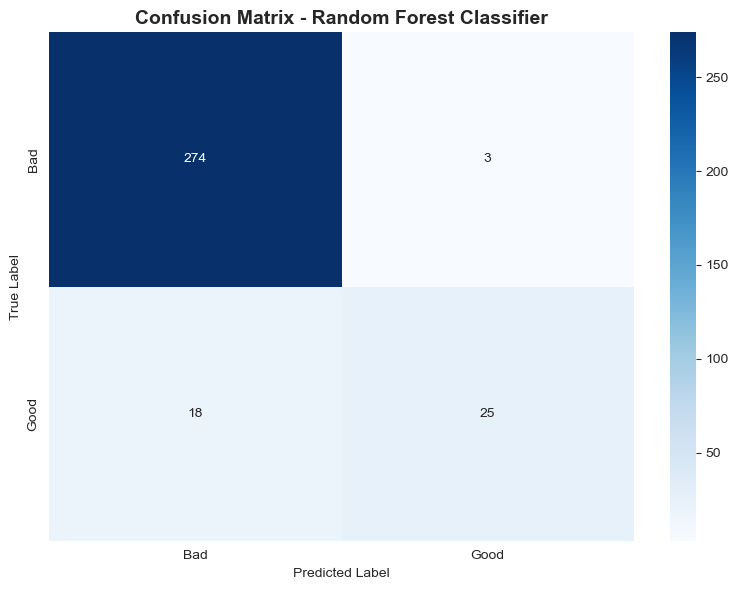


--- Classification Report ---
              precision    recall  f1-score   support

    Bad Wine       0.94      0.99      0.96       277
   Good Wine       0.89      0.58      0.70        43

    accuracy                           0.93       320
   macro avg       0.92      0.79      0.83       320
weighted avg       0.93      0.93      0.93       320



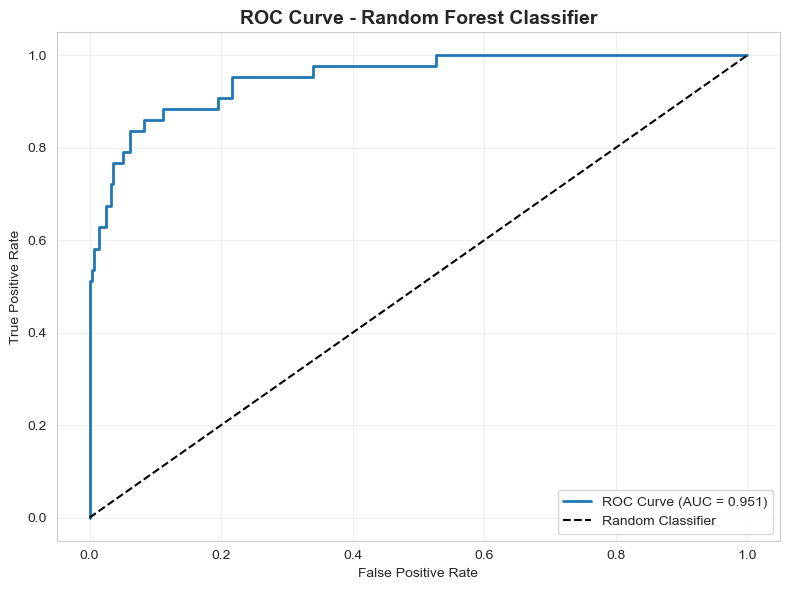

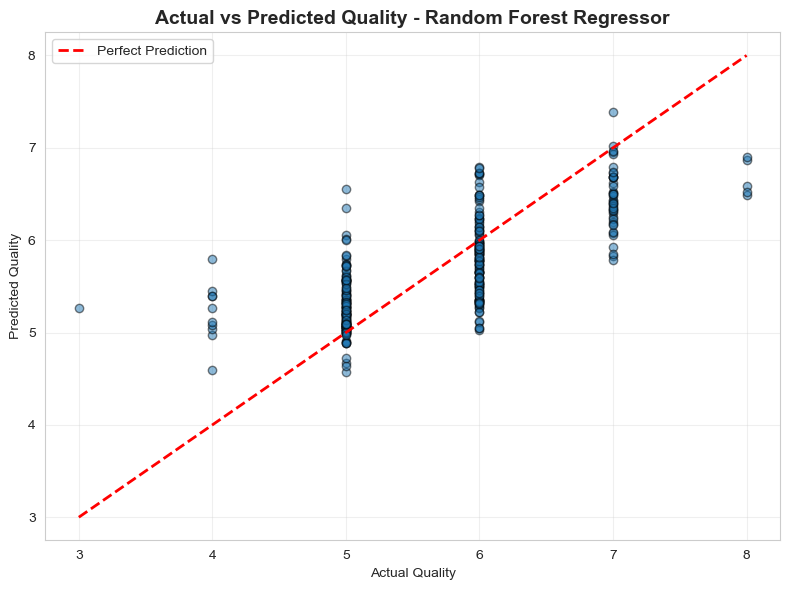

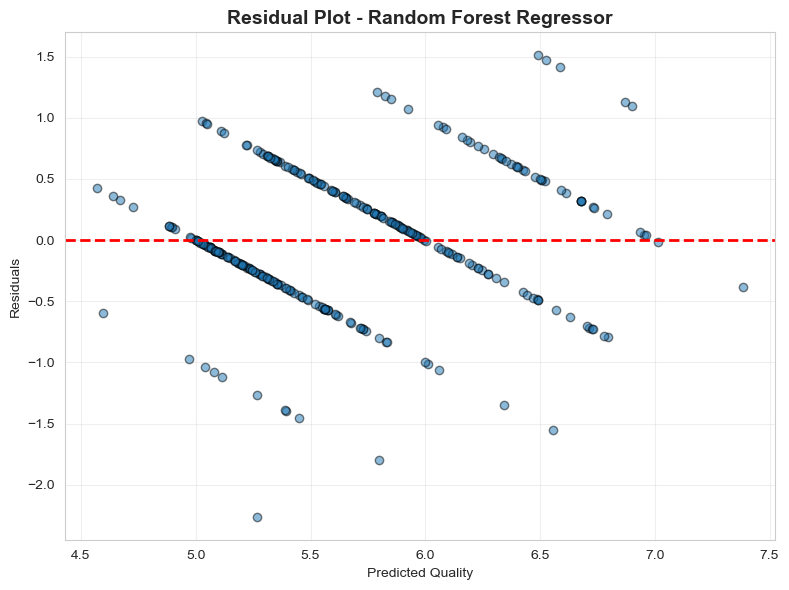

In [16]:
# ============================================================================
# STEP 11: DETAILED EVALUATION
# ============================================================================
print("\n" + "="*80)
print("STEP 11: DETAILED EVALUATION")
print("="*80)

# Confusion Matrix
print("\n--- Confusion Matrix (Best Classification Model) ---")
cm = confusion_matrix(y_clf_test, best_rf_clf_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Confusion Matrix - Random Forest Classifier', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_clf_test, best_rf_clf_pred, 
                          target_names=['Bad Wine', 'Good Wine']))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_clf_test, best_rf_clf_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc_score(y_clf_test, best_rf_clf_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Regression: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_reg_test, best_rf_pred, alpha=0.5, edgecolors='k')
plt.plot([y_reg_test.min(), y_reg_test.max()], 
         [y_reg_test.min(), y_reg_test.max()], 
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality - Random Forest Regressor', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Residual Plot
residuals = y_reg_test - best_rf_pred
plt.figure(figsize=(8, 6))
plt.scatter(best_rf_pred, residuals, alpha=0.5, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.title('Residual Plot - Random Forest Regressor', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


STEP 12: FEATURE IMPORTANCE & INTERPRETATION

--- Feature Importance (Random Forest Regressor) ---
                 Feature  Importance
10               alcohol    0.272652
9              sulphates    0.151100
1       volatile acidity    0.108390
6   total sulfur dioxide    0.077636
4              chlorides    0.070043
8                     pH    0.061484
3         residual sugar    0.058068
7                density    0.052488
0          fixed acidity    0.052336
2            citric acid    0.048978
5    free sulfur dioxide    0.046824


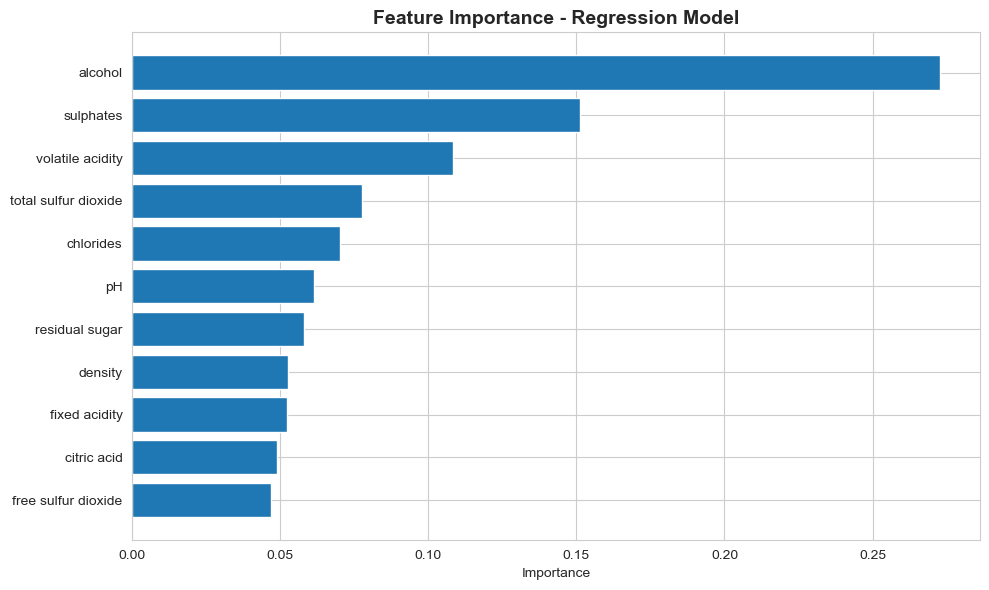


--- Feature Importance (Random Forest Classifier) ---
                 Feature  Importance
10               alcohol    0.173399
9              sulphates    0.110749
1       volatile acidity    0.104858
7                density    0.101697
2            citric acid    0.091710
0          fixed acidity    0.078603
6   total sulfur dioxide    0.073579
4              chlorides    0.071760
3         residual sugar    0.069744
8                     pH    0.064166
5    free sulfur dioxide    0.059735


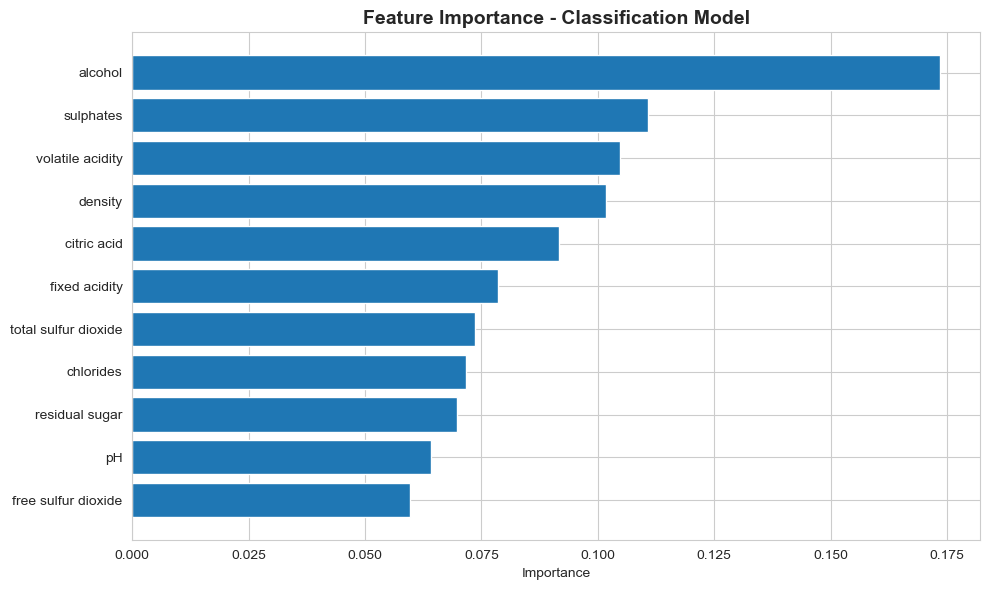


--- Linear Regression Coefficients ---
                 Feature  Coefficient
10               alcohol     0.296628
1       volatile acidity    -0.179439
9              sulphates     0.146815
6   total sulfur dioxide    -0.120008
4              chlorides    -0.089084
8                     pH    -0.060610
5    free sulfur dioxide     0.058015
0          fixed acidity     0.039789
2            citric acid    -0.027512
7                density    -0.019204
3         residual sugar     0.009421


In [17]:
# ============================================================================
# STEP 12: FEATURE IMPORTANCE
# ============================================================================
print("\n" + "="*80)
print("STEP 12: FEATURE IMPORTANCE & INTERPRETATION")
print("="*80)

# Regression: Feature Importance
print("\n--- Feature Importance (Random Forest Regressor) ---")
feature_importance_reg = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_reg.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_reg)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_reg['Feature'], feature_importance_reg['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Regression Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Classification: Feature Importance
print("\n--- Feature Importance (Random Forest Classifier) ---")
feature_importance_clf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_clf.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_clf)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_clf['Feature'], feature_importance_clf['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Classification Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Linear Regression Coefficients
print("\n--- Linear Regression Coefficients ---")
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_df)

In [18]:
# ============================================================================
# STEP 13: SAVE MODELS
# ============================================================================
print("\n" + "="*80)
print("STEP 13: SAVING MODELS")
print("="*80)

# Save best models
joblib.dump(best_rf_reg, 'wine_quality_regressor.pkl')
joblib.dump(best_rf_clf, 'wine_quality_classifier.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

print("\nModels saved successfully!")
print("- wine_quality_regressor.pkl")
print("- wine_quality_classifier.pkl")
print("- feature_scaler.pkl")


STEP 13: SAVING MODELS

Models saved successfully!
- wine_quality_regressor.pkl
- wine_quality_classifier.pkl
- feature_scaler.pkl


In [19]:
# ============================================================================
# STEP 14: FINAL REPORT SUMMARY
# ============================================================================
print("\n" + "="*80)
print("FINAL PROJECT SUMMARY")
print("="*80)

print(f"""
DATASET OVERVIEW:
- Total samples: {df.shape[0]}
- Features: {df.shape[1] - 2}  (11 physicochemical properties)
- Target distribution: Quality scores range from {df['quality'].min()} to {df['quality'].max()}
- Good wines (quality >= 7): {(df['quality'] >= 7).sum()} ({(df['quality'] >= 7).mean()*100:.1f}%)

PREPROCESSING:
- No missing values found
- Features standardized using StandardScaler
- Outliers retained as they represent genuine wine characteristics
- Train/test split: 80/20

REGRESSION RESULTS:
Best Model: Random Forest Regressor (Tuned)
- MAE: {best_rf_mae:.4f}
- RMSE: {best_rf_rmse:.4f}
- R²: {best_rf_r2:.4f}

CLASSIFICATION RESULTS:
Best Model: Random Forest Classifier (Tuned)
- Accuracy: {accuracy_score(y_clf_test, best_rf_clf_pred):.4f}
- Precision: {precision_score(y_clf_test, best_rf_clf_pred):.4f}
- Recall: {recall_score(y_clf_test, best_rf_clf_pred):.4f}
- F1-Score: {f1_score(y_clf_test, best_rf_clf_pred):.4f}
- ROC AUC: {roc_auc_score(y_clf_test, best_rf_clf_proba):.4f}

TOP 3 IMPORTANT FEATURES (Regression):
{feature_importance_reg.head(3).to_string(index=False)}

LIMITATIONS & FUTURE WORK:
1. Dataset size: Only {df.shape[0]} samples may limit model generalization
2. Class imbalance: Only {(df['quality'] >= 7).mean()*100:.1f}% of wines are classified as "good"
3. Feature engineering: Could explore polynomial features or interactions
4. Quality scores are subjective and based on expert ratings
5. Model interpretability: Could use SHAP values for deeper insights
6. Cross-validation could be expanded to k-fold for more robust evaluation
"""
)

print("="*80)
print("PROJECT COMPLETE!")
print("="*80)


FINAL PROJECT SUMMARY

DATASET OVERVIEW:
- Total samples: 1599
- Features: 11  (11 physicochemical properties)
- Target distribution: Quality scores range from 3 to 8
- Good wines (quality >= 7): 217 (13.6%)

PREPROCESSING:
- No missing values found
- Features standardized using StandardScaler
- Outliers retained as they represent genuine wine characteristics
- Train/test split: 80/20

REGRESSION RESULTS:
Best Model: Random Forest Regressor (Tuned)
- MAE: 0.4251
- RMSE: 0.5531
- R²: 0.5319

CLASSIFICATION RESULTS:
Best Model: Random Forest Classifier (Tuned)
- Accuracy: 0.9344
- Precision: 0.8929
- Recall: 0.5814
- F1-Score: 0.7042
- ROC AUC: 0.9512

TOP 3 IMPORTANT FEATURES (Regression):
         Feature  Importance
         alcohol    0.272652
       sulphates    0.151100
volatile acidity    0.108390

LIMITATIONS & FUTURE WORK:
1. Dataset size: Only 1599 samples may limit model generalization
2. Class imbalance: Only 13.6% of wines are classified as "good"
3. Feature engineering: Co